# Fitting the GAM

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from interpret.glassbox import ExplainableBoostingRegressor
wine = pd.read_csv('../Ch07-SHAP for Linear Models/wine.csv')
y = wine['quality']
X = wine.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )
model = ExplainableBoostingRegressor(interactions=0)
model.fit(X_train, y_train)

ExplainableBoostingRegressor(interactions=0)

In [4]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 0.55


# Interpreting the GAM with SHAP

In [5]:
import shap
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
Permutation explainer: 981it [00:42, 18.80it/s]                         


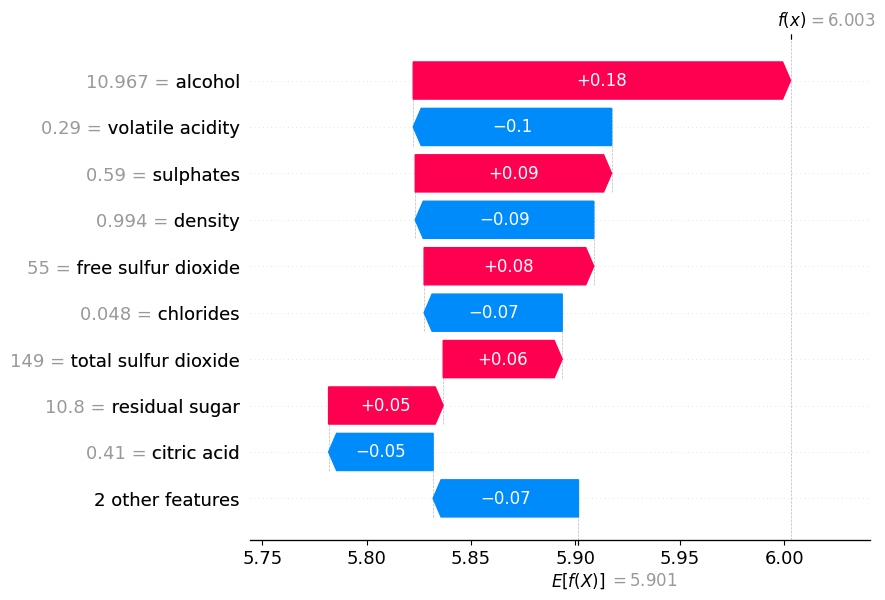

In [6]:
shap.plots.waterfall(shap_values[0], max_display=10)

# SHAP recovers non-linear functions

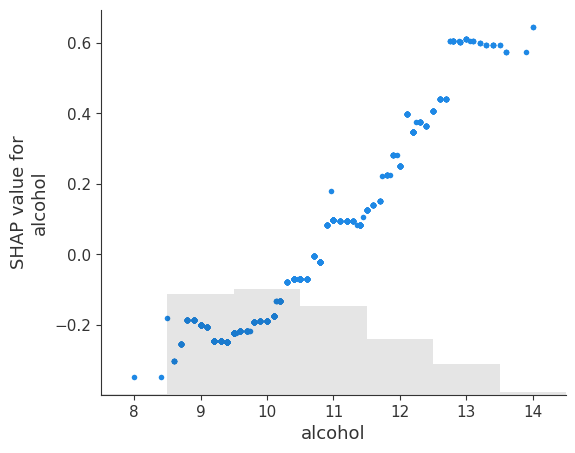

In [7]:
shap.plots.scatter(shap_values[:,"alcohol"])

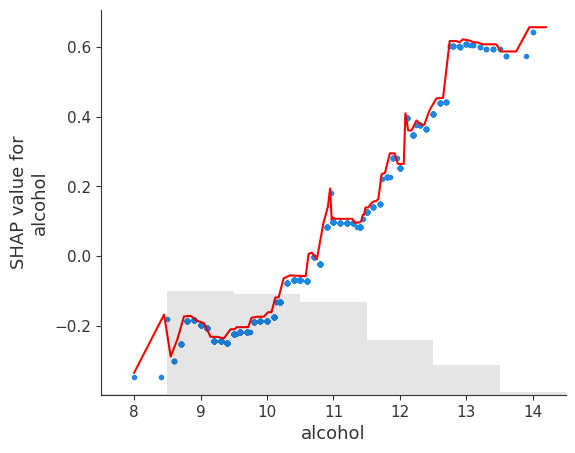

In [8]:
import matplotlib.pyplot as plt
import numpy as np
shap.plots.scatter(shap_values[:,"alcohol"], show=False) 

# First get the index of the alcohol feature 
idx = model.explain_global().data()['names'].index('alcohol') 
# extract the relevant data from the tree-based GAM
explain_data = model.explain_global().data(idx) 
# the alcohol feature values 
x_data = explain_data["names"]
# the part of the prediction function for alcohol 
y_data = explain_data["scores"]
y_data = np.r_[y_data, y_data[np.newaxis, -1]]
plt.plot(x_data, y_data, color='red')
plt.show()

# Analyzing feature importance

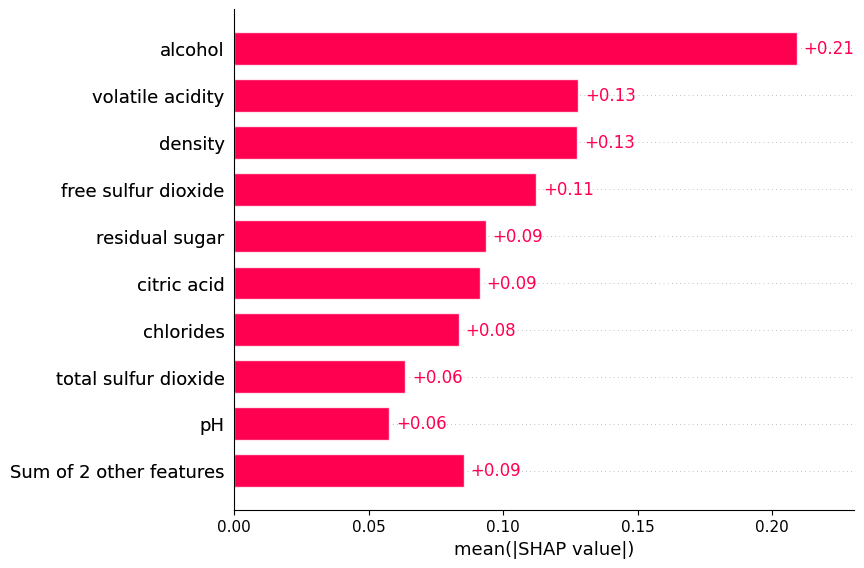

In [9]:
shap.plots.bar(shap_values)